## Dataset

In [97]:
from sklearn.datasets import load_iris

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [99]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

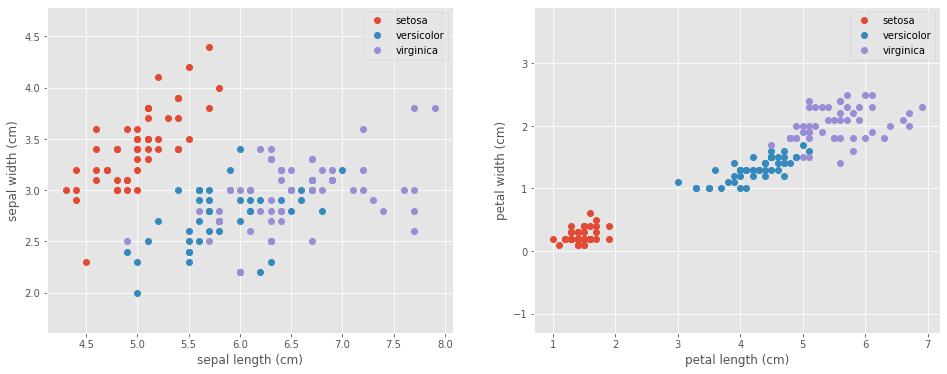

In [100]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## K means

In [101]:
from sklearn.cluster import KMeans 

### Elbow method

In [102]:
sse = []
for i in range(1, 8):
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(X)
    sse.append(k_means.inertia_)

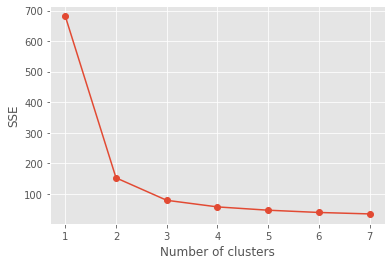

In [103]:
plt.plot(range(1, 8), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### Silhouette

In [104]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [111]:
silhouette_scores = []
for i in range(2, 8):
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(X)
    silhouette_scores.append(silhouette_score(X, k_means.fit_predict(X)))

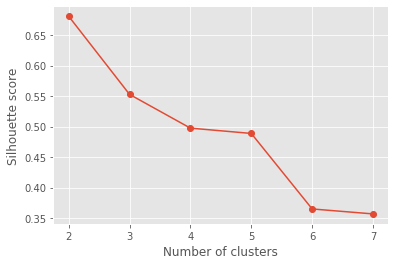

In [113]:
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### Model

In [107]:
k_means = KMeans(n_clusters=2, random_state=0)

In [108]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [87]:
k_means_labels = k_means.labels_

In [88]:
unique_labels = np.unique(k_means_labels)

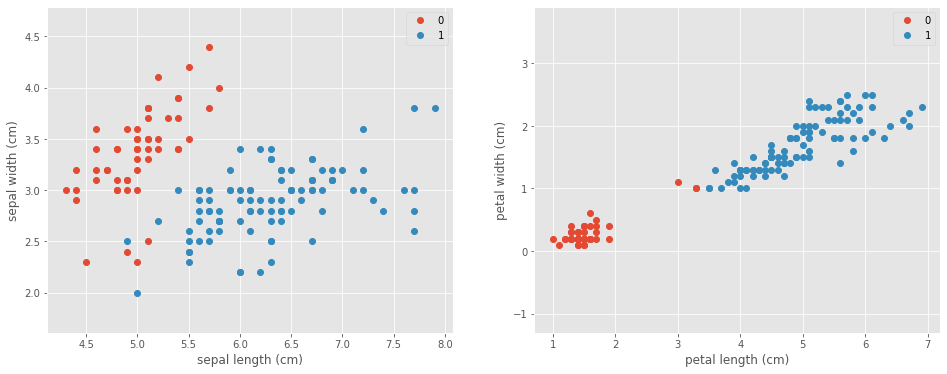

In [89]:

# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target in unique_labels:
    X_plot = X[k_means_labels == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target in unique_labels:
    X_plot = X[k_means_labels == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

In [114]:
dbscan = DBSCAN(eps=0.4, min_samples=5)

In [115]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [116]:
dbscan_labels = dbscan.labels_

In [117]:
unique_labels = np.unique(dbscan_labels)

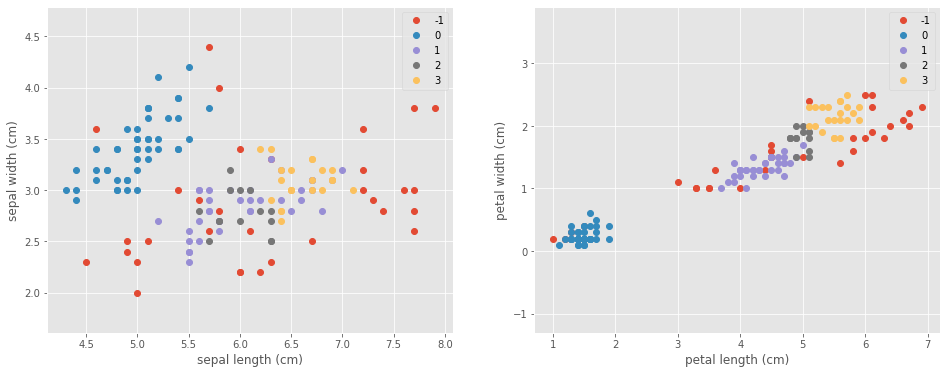

In [118]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target in unique_labels:
    X_plot = X[dbscan_labels == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target in unique_labels:
    X_plot = X[dbscan_labels == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();